In [1]:
import pandas as pd
df = pd.read_csv('RQ2+3.csv')
df

,SI,strata,count_domain,Domain,text,Extract_links,Link,RQ2 target,RQ3 perpose,RQ- category
0,1,common,4334,github.com,@bitandbang this action can turn on automerge ...,['https://t.co/8LmG6q85er'],https://github.com/alexwilson/enable-github-au...,repository,elaborating,package management
1,6,sometimes,6,polyfill.io,@b0neskull @openjsf I run https://t.co/29YaS03...,['https://t.co/29YaS03zrD'],https://polyfill.io/,404,clarifying,other
2,9,common,4327,github.com,@dependabot Is there a guide on how to publish...,['https://t.co/2E3ozqRCJT'],https://github.com/polyfillpolyfill/polyfill-s...,Q&A thread,clarifying,package management
3,10,common,2252,www.npmjs.com,@fquednau @polyfillio I don't think there are ...,['https://t.co/B7L5TrW0jS'],https://www.npmjs.com/package/polyfill-library,API documentation,suggesting solution,package management
4,12,sometimes,9,www.jsdelivr.com,@doramilitaru Another npm CDN is jsDelivr: htt...,['https://t.co/Fec4uVh7Gx'],https://www.jsdelivr.com/,software homepage,providing context,package management
...,...,...,...,...,...,...,...,...,...,...
2120,142,rare,1,elastic.co,Go watch @seldo talking about the infrastructu...,['https://t.co/bIP9GTo9Od'],https://www.elastic.co/observability/applicati...,application,suggesting solution,community related
2121,296,rare,1,archive.uber.com,Remember. When @npmjs goes down. Use an archiv...,['http://t.co/IibxhfcDUd'],http://archive.uber.com/npm,404,suggesting solution,package management
2122,1178,rare,1,google.de,"@npmjs oh, google to the rescue (?) :) https:/...",['https://t.co/CYVPffy9ns'],https://www.google.de/search?safe=off&q=infini...,other,elaborating,package management
2123,18394,rare,1,irc.freenode.net,If you try to access the #npm channel on https...,['https://t.co/X3qGrR5Ef4'],http://irc.freenode.net/,404,suggesting solution,package management


In [2]:
df.isna().sum()

SI               0
strata           0
count_domain     0
Domain           0
text             0
Extract_links    0
Link             0
RQ2 target       0
RQ3 perpose      0
RQ- category     0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2125 entries, 0 to 2124
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SI             2125 non-null   int64 
 1   strata         2125 non-null   object
 2   count_domain   2125 non-null   int64 
 3   Domain         2125 non-null   object
 4   text           2125 non-null   object
 5   Extract_links  2125 non-null   object
 6   Link           2125 non-null   object
 7   RQ2 target     2125 non-null   object
 8   RQ3 perpose    2125 non-null   object
 9   RQ- category   2125 non-null   object
dtypes: int64(2), object(8)
memory usage: 166.1+ KB


In [4]:
strt = df['strata'].value_counts()
strt

strata
common       715
sometimes    706
rare         704
Name: count, dtype: int64

In [5]:
target = df['RQ2 target'].value_counts()
target

RQ2 target
tutorial or article      460
blog post                410
software homepage        338
404                      239
other                    123
API documentation        123
application              117
repository               106
code                      61
organization homepage     48
specification             28
Q&A thread                24
personal homepage         11
book content              10
licence                    8
bug report                 6
stack overflow             5
research paper             4
forum thread               3
GitHub profile             1
Name: count, dtype: int64

In [6]:
perpose = df['RQ3 perpose'].value_counts()
perpose

RQ3 perpose
providing context      990
elaborating            464
suggesting solution    282
clarifying             240
other                  149
Name: count, dtype: int64

In [7]:
category = df['RQ- category'].value_counts()
category

RQ- category
package management    942
notification          655
other                 394
community related     134
Name: count, dtype: int64

In [8]:
pivot_table = df.pivot_table(index='RQ2 target', columns='strata', aggfunc='size', fill_value=0)

pivot_table['frequency'] = pivot_table.sum(axis=1)

pivot_table.rename(columns={'common': 'common', 'sometimes': 'sometimes','rare':'rare'}, inplace=True)

pivot_table.reset_index(inplace=True)

pivot_table = pivot_table[['RQ2 target', 'frequency', 'common', 'sometimes','rare']]

#print(pivot_table)
pivot_table['common%']=(pivot_table['common'] / 715) * 100
pivot_table['sometimes%']=(pivot_table['sometimes'] / 706) * 100
pivot_table['rare%']=(pivot_table['rare'] / 704) * 100
#pivot_table

target_table = pivot_table.sort_values(by='frequency', ascending=False)
print(target_table)

strata             RQ2 target  frequency  common  sometimes  rare    common%  \
19        tutorial or article        460     112        209   139  15.664336   
5                   blog post        410     215        117    78  30.069930   
16          software homepage        338      58        116   164   8.111888   
0                         404        239      52         77   110   7.272727   
1           API documentation        123      73         26    24  10.209790   
12                      other        123      27         42    54   3.776224   
4                 application        117      18         35    64   2.517483   
14                 repository        106     100          6     0  13.986014   
8                        code         61      24         25    12   3.356643   
11      organization homepage         48       5         17    26   0.699301   
17              specification         28       4         10    14   0.559441   
3                  Q&A thread         24

In [9]:
pivot_table = df.pivot_table(index='RQ3 perpose', columns='strata', aggfunc='size', fill_value=0)

pivot_table['frequency'] = pivot_table.sum(axis=1)

pivot_table.rename(columns={'common': 'common', 'sometimes': 'sometimes','rare':'rare'}, inplace=True)

pivot_table.reset_index(inplace=True)

pivot_table = pivot_table[['RQ3 perpose', 'frequency', 'common', 'sometimes','rare']]

#print(pivot_table)
pivot_table['common%']=(pivot_table['common'] / 715) * 100
pivot_table['sometimes%']=(pivot_table['sometimes'] / 706) * 100
pivot_table['rare%']=(pivot_table['rare'] / 704) * 100
#pivot_table

perpose_table = pivot_table.sort_values(by='frequency', ascending=False)
print(perpose_table)

strata          RQ3 perpose  frequency  common  sometimes  rare    common%  \
3         providing context        990     370        313   307  51.748252   
1               elaborating        464     129        166   169  18.041958   
4       suggesting solution        282      78         82   122  10.909091   
0                clarifying        240      85         90    65  11.888112   
2                     other        149      53         55    41   7.412587   

strata  sometimes%      rare%  
3        44.334278  43.607955  
1        23.512748  24.005682  
4        11.614731  17.329545  
0        12.747875   9.232955  
2         7.790368   5.823864  


In [13]:
import pandas as pd
df = pd.read_csv('RQ2+3.csv')

pivot_table = df.pivot_table(index='RQ- category', columns='strata', aggfunc='size', fill_value=0)

pivot_table['frequency'] = pivot_table.sum(axis=1)

pivot_table.rename(columns={'common': 'common', 'sometimes': 'sometimes','rare':'rare'}, inplace=True)

pivot_table.reset_index(inplace=True)

pivot_table = pivot_table[['RQ- category', 'frequency', 'common', 'sometimes','rare']]

#print(pivot_table)
pivot_table['common%']=(pivot_table['common'] / 715) * 100
pivot_table['sometimes%']=(pivot_table['sometimes'] / 706) * 100
pivot_table['rare%']=(pivot_table['rare'] / 704) * 100
#pivot_table

category_table = pivot_table.sort_values(by='frequency', ascending=False)
category_table
#latex_code = category_table.to_latex(index=False)
print(category_table)

strata        RQ- category  frequency  common  sometimes  rare    common%  \
3       package management        942     292        328   322  40.839161   
1             notification        655     237        206   212  33.146853   
2                    other        394     141        121   132  19.720280   
0        community related        134      45         51    38   6.293706   

strata  sometimes%      rare%  
3        46.458924  45.738636  
1        29.178470  30.113636  
2        17.138810  18.750000  
0         7.223796   5.397727  


RQ- category
package management    942
notification          655
other                 394
community related     134
Name: count, dtype: int64


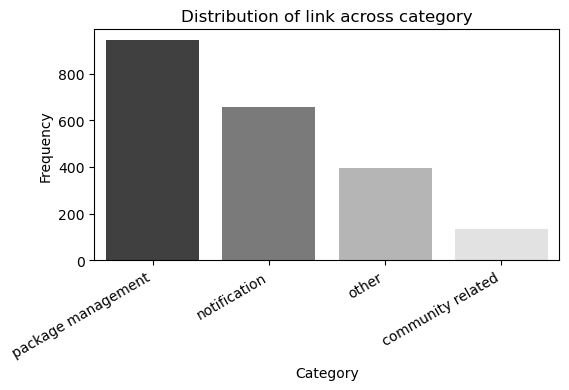

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv('RQ2+3.csv')
cat_counts = df['RQ- category'].value_counts()
print(cat_counts)

plt.figure(figsize=(6, 3))
sns.barplot(x=cat_counts.index, y=cat_counts.values, palette = 'Greys_r')
plt.title('Distribution of link across category')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=30, ha='right')
plt.show()

In [81]:
import pandas as pd

df = pd.read_csv('Domain_count.csv')

# Display the first few rows of the dataframe
df.head()



,Unnamed: 0,Domain,Count
0,1762,twitter.com,4809
1,705,github.com,4281
2,1222,npmjs.com,2268
3,224,blog.npmjs.org,522
4,1062,medium.com,390


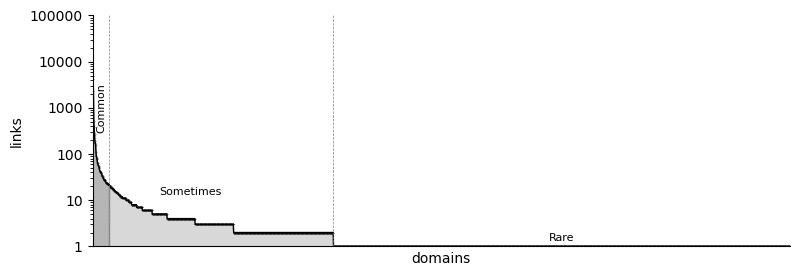

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('Domain_count.csv')
# Assuming df_sorted is already defined as per your sorting logic
df_sorted = df.sort_values(by='Count', ascending=False).reset_index(drop=True)
# Plotting the domain count field as a line with points and log scale
plt.figure(figsize=(9, 3))
plt.plot(df_sorted['Domain'], df_sorted['Count'], marker='.', linestyle='solid', color='black', linewidth=1, markersize=0.4)
plt.yscale('log')
#plt.title('Domain Count (Log Scale)')
plt.xlabel('domains')
plt.ylabel('links')
plt.ylim(1, 100000)  # Set y-axis limits from 1 to 100000
plt.xlim(-0.5, len(df_sorted) - 0.5) 
plt.xticks([])  # Hides the x-ticks




# Calculate the positions for the categories
common_threshold = df_sorted[df_sorted['Count'] > 20].index[-1]
sometimes_threshold = df_sorted[df_sorted['Count'] > 1].index[-1]

# Add vertical lines at thresholds
plt.axvline(x=common_threshold, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(x=sometimes_threshold, color='gray', linestyle='--', linewidth=0.5)

# Define colors for common, sometimes, and rare
color_common = '#101010'
color_sometimes = '#808080'
color_rare = 'lightgray'

# Plotting each category with different colors
plt.fill_between(df_sorted.index[:common_threshold + 1], df_sorted['Count'].iloc[:common_threshold + 1], color=color_common, alpha=0.3)
plt.fill_between(df_sorted.index[common_threshold + 1:sometimes_threshold + 1], df_sorted['Count'].iloc[common_threshold + 1:sometimes_threshold + 1], color=color_sometimes, alpha=0.3)
plt.fill_between(df_sorted.index[sometimes_threshold + 1:], df_sorted['Count'].iloc[sometimes_threshold + 1:], color=color_rare, alpha=0.3)

# Annotate the sections
plt.text(common_threshold / 2, 1000, 'Common', fontsize=8, ha='center', va='center',rotation=90)
plt.text((sometimes_threshold + common_threshold) / 2, 15, 'Sometimes', fontsize=8, ha='right', va='center')
plt.text((sometimes_threshold + len(df_sorted)) / 2, 1.2, 'Rare', fontsize=8, ha='center', va='bottom')

# Remove the top and right spines (axes)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}'))

#plt.gca().yaxis.set_tick_params(length=0)
plt.savefig("strata.pdf", format="pdf")
plt.show()


# Construction of thestratified sample

In [83]:
#Add strata on domain


In [84]:
df =pd.read_csv("all links with domain.csv")
df

,Unnamed: 0,extract_link,actual_link,link_status,Domain
0,0,https://t.co/OLqp1BsxAz,https://docs.npmjs.com/cli/v7/using-npm/config...,200,docs.npmjs.com
1,1,https://t.co/8LmG6q85er,https://github.com/alexwilson/enable-github-au...,200,github.com
2,2,https://t.co/Anh4jNvFos,https://github.com/Financial-Times/scrumple,200,github.com
3,3,https://t.co/n0uTImoHNs,https://polyfill.io/v3/packages/#create-polyfi...,Request failed,polyfill.io
4,4,https://t.co/o1hvToZ4J1,https://www.npmjs.com/package/@financial-times...,200,npmjs.com
...,...,...,...,...,...
18403,18404,https://t.co/dGDWxky4lA,https://www.google.com/search?q=Amor,200,google.com
18404,18405,https://t.co/NASiJWftT9,http://www.amor.cool/npm-script/,Request failed,amor.cool
18405,18406,https://t.co/2hFvDQu0Hw,http://amor.ninja/2016/11/24/%E5%A6%82%E4%BD%9...,Request failed,amor.ninja
18406,18407,https://t.co/8IPuKLnYA7,https://engineering.fb.com/2016/10/11/web/yarn...,200,engineering.fb.com


In [85]:
df1 = pd.read_csv('Domain_count.csv')
df1.drop(['Unnamed: 0',],axis=1,inplace=True)
df1

,Domain,Count
0,twitter.com,4809
1,github.com,4281
2,npmjs.com,2268
3,blog.npmjs.org,522
4,medium.com,390
...,...,...
1917,hilgraeve.com,1
1918,hexo.io,1
1919,hexdocs.pm,1
1920,hexa.run,1


In [86]:
df = pd.merge(df, df1, on='Domain')
df=df.sort_values(by='Count', ascending=False)
   

In [87]:
def categorize(value):
    if value > 20:
        return 'common'
    elif 2 <= value < 21:
        return 'sometimes'
    else:
        return 'rare'


In [88]:
# Add a new column 'Status' based on the conditions
df['strata'] = df['Count'].apply(categorize)
#df.to_csv('tmp.csv')
df

,Unnamed: 0,extract_link,actual_link,link_status,Domain,Count,strata
9203,9115,https://t.co/R4Z6EbmkZI,https://twitter.com/DwordDesign/status/1363568...,200,twitter.com,4809,common
9848,11576,https://t.co/J7NdigtL56,https://twitter.com/reimertz/status/9148619670...,200,twitter.com,4809,common
9854,11587,https://t.co/JoJmjNJwm9,https://twitter.com/reverentgeek/status/123962...,200,twitter.com,4809,common
9853,11586,https://t.co/yLNdbSuh1M,https://twitter.com/reverentgeek/status/123974...,200,twitter.com,4809,common
9852,11582,https://t.co/lHogd1iooT,https://twitter.com/phily245/status/1014941342...,200,twitter.com,4809,common
...,...,...,...,...,...,...,...
17123,8197,http://t.co/O1YSeKWBSu,http://semver.io/npm/versions,Request failed,semver.io,1,rare
17120,8174,http://t.co/cqrbnanwtE,https://wordpress.com/,200,wordpress.com,1,rare
17119,8168,https://t.co/LHRiMOP0Bm,https://taskfile.dev/,200,taskfile.dev,1,rare
17118,8163,http://t.co/WUseiRQBSM,https://blog.andyet.com/2014/08/13/opinionated...,200,blog.andyet.com,1,rare


In [89]:
t1 = df.groupby('strata').agg({'Domain': 'nunique', 'actual_link': 'nunique'}).reset_index()
t1.columns = ['strata', ' #domains', '#links variation']
print(t1)
t2 = df.groupby('strata').size().reset_index(name='links')
#t2 = t1.sort_values(by='links',ascending=False)
print(t2)

      strata   #domains  #links variation
0     common         47             11894
1       rare       1256              1256
2  sometimes        619              1709
      strata  links
0     common  14594
1       rare   1256
2  sometimes   2557


In [90]:
dff = pd.merge(t1, t2, on='strata')
dff=dff.sort_values(by='links', ascending=False)
print(dff)

      strata   #domains  #links variation  links
0     common         47             11894  14594
2  sometimes        619              1709   2557
1       rare       1256              1256   1256


# Association between Link Target Types and Link Perpose

In [91]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

df = pd.read_csv('RQ2+3.csv')
common = df[(df['strata'] == 'common')]


transactions = common.apply(lambda row: [row['RQ2 target'], row['RQ3 perpose']], axis=1).tolist()

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

df = pd.DataFrame(te_ary, columns=te.columns_)

min_support = 4 / len(df)

frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)


rules_c = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)# Generate association rules with confidence=0.7
rules_c['support']=rules_c['support']*len(df)
rules_c = rules_c.sort_values(by='support',ascending=False)

# Display the results
#print("Frequent Itemsets:\n", frequent_itemsets)
#print("Association Rules:\n", rules)

# Save results to CSV if needed
#frequent_itemsets.to_csv('frequent_itemsets.csv', index=False)
#rules.to_csv('association_rules.csv', index=False)
rules_c

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(tutorial or article),(providing context),0.156643,0.517483,85.0,0.758929,1.466578,0.037821,2.001554,0.377231
0,(404),(providing context),0.072727,0.517483,37.0,0.711538,1.375000,0.014113,1.672727,0.294118
2,(application),(providing context),0.025175,0.517483,15.0,0.833333,1.610360,0.007951,2.895105,0.388809
1,(Q&A thread),(clarifying),0.025175,0.118881,14.0,0.777778,6.542484,0.016588,3.965035,0.869031


In [92]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

df = pd.read_csv('RQ2+3.csv')
sometimes = df[(df['strata'] == 'sometimes')]


transactions = sometimes.apply(lambda row: [row['RQ2 target'], row['RQ3 perpose']], axis=1).tolist()
#len(transactions)

# Encode the transactions using TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
#len(te_ary)
#te_ary
df = pd.DataFrame(te_ary, columns=te.columns_)
#df
# Apply the Apriori algorithm with a support threshold of 4 / number of transactions
min_support = 4 / len(df)
#print(min_support)
frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)

# Generate association rules with a confidence threshold of 0.7
rules_s = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules_s['support']=rules_s['support']*len(df)
rules_s = rules_s.sort_values(by='support',ascending=False)
# Display the results
#print("Frequent Itemsets:\n", frequent_itemsets)
#print("Association Rules:\n", rules)

# Save results to CSV if needed
#frequent_itemsets.to_csv('frequent_itemsets.csv', index=False)
#rules.to_csv('association_rules.csv', index=False)
rules_s

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(tutorial or article),(providing context),0.296034,0.443343,153.0,0.732057,1.651222,0.085469,2.077524,0.560237
0,(code),(elaborating),0.035411,0.235127,23.0,0.920000,3.912771,0.024252,9.560907,0.771755
1,(organization homepage),(elaborating),0.024079,0.235127,13.0,0.764706,3.252303,0.012752,3.250708,0.709613
2,(personal homepage),(providing context),0.008499,0.443343,5.0,0.833333,1.879659,0.003314,3.339943,0.472000


In [93]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

df = pd.read_csv('RQ2+3.csv')
rare = df[(df['strata'] == 'rare')]

# Preprocess the data to create transactions
transactions = rare.apply(lambda row: [row['RQ2 target'], row['RQ3 perpose']], axis=1).tolist()
#len(transactions)

# Encode the transactions using TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
#len(te_ary)
#te_ary
df = pd.DataFrame(te_ary, columns=te.columns_)
#df
# Apply the Apriori algorithm with a support threshold of 4 / number of transactions
min_support = 4 / len(df)
#print(min_support)
frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)

# Generate association rules with a confidence threshold of 0.7
rules_r = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules_r['support']=rules_r['support']*len(df)
rules_r = rules_r.sort_values(by='support',ascending=False)
# Display the results
#print("Frequent Itemsets:\n", frequent_itemsets)
#print("Association Rules:\n", rules)

# Save results to CSV if needed
#frequent_itemsets.to_csv('frequent_itemsets.csv', index=False)
#rules.to_csv('association_rules.csv', index=False)

rules_r

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(application),(providing context),0.090909,0.43608,48.0,0.750000,1.719870,0.028538,2.255682,0.460417
2,(specification),(providing context),0.019886,0.43608,10.0,0.714286,1.637971,0.005533,1.973722,0.397391
1,(book content),(providing context),0.005682,0.43608,4.0,1.000000,2.293160,0.003204,inf,0.567143


In [96]:
rules_c['strata'] = 'common'
rules_s['strata'] = 'sometimes'
rules_r['strata'] = 'rare'
final = pd.concat([rules_c, rules_s,rules_r], axis=0)
final=final[['strata','antecedents','consequents','confidence','support']]
final['support'] = final['support'].astype(int)
final

,strata,antecedents,consequents,confidence,support
3,common,(tutorial or article),(providing context),0.758929,85
0,common,(404),(providing context),0.711538,37
2,common,(application),(providing context),0.833333,15
1,common,(Q&A thread),(clarifying),0.777778,14
3,sometimes,(tutorial or article),(providing context),0.732057,153
0,sometimes,(code),(elaborating),0.920000,23
1,sometimes,(organization homepage),(elaborating),0.764706,13
2,sometimes,(personal homepage),(providing context),0.833333,5
0,rare,(application),(providing context),0.750000,48
2,rare,(specification),(providing context),0.714286,10


# Plot stacked plot of target and perpose

In [72]:
import pandas as pd
df = pd.read_csv('RQ2+3.csv')
df=df[['RQ2 target','RQ3 perpose']]
df = pd.pivot_table(df, index='RQ3 perpose', columns='RQ2 target', aggfunc='size', fill_value=0)
df = df.transpose()
df

RQ3 perpose,clarifying,elaborating,other,providing context,suggesting solution
RQ2 target,,,,,
404,17,59,19,108,36
API documentation,11,21,5,59,27
GitHub profile,0,0,0,0,1
Q&A thread,14,4,1,4,1
application,4,24,5,70,14
blog post,48,86,46,178,52
book content,0,3,1,6,0
bug report,2,1,0,3,0
code,6,28,1,18,8


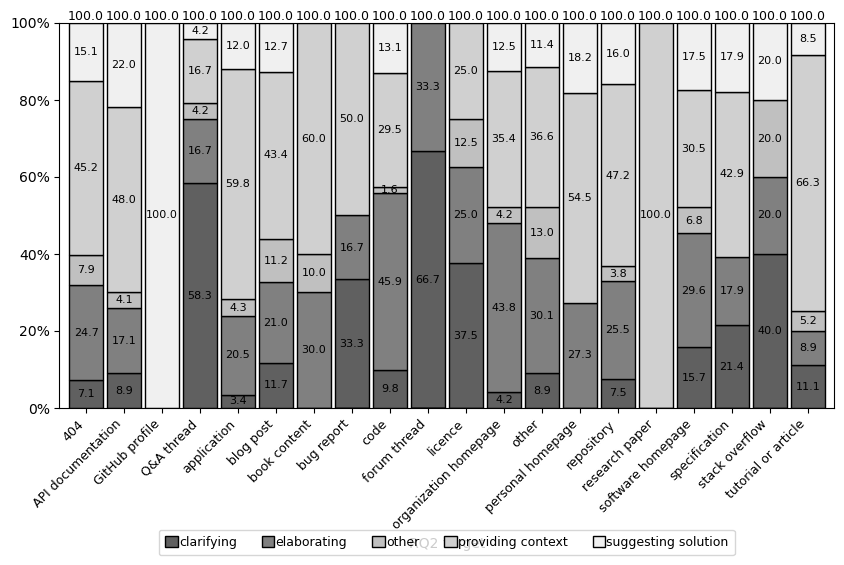

In [104]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as mcolors
import pandas as pd

# Convert counts to percentages
df_percentage = df.div(df.sum(axis=1), axis=0) * 100

colors = ['#606060', '#808080','#a0a0a0','#c0c0c0','#d0d0d0', '#f0f0f0' ]
custom_cmap = mcolors.ListedColormap(colors)

# Plotting the stacked bar chart with percentages
ax = df_percentage.plot(kind='bar', stacked=True, figsize=(10, 5), cmap=custom_cmap, edgecolor='black', width=0.9)

# Set y-axis limits
ax.set_ylim(0, 100)

# Format y-axis labels as percentages
formatter = FuncFormatter(lambda x, _: f'{int(x)}%')
ax.yaxis.set_major_formatter(formatter)

# Adjust margins to increase space on the left side
ax.margins(x=0.1)  # Increase the x margin to add space around bars

# Adjust x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=9)  # Adjust font size as needed
# Add quantity and percentage values on top of each bar
for i, (index, row) in enumerate(df.iterrows()):
    cumulative_height = 0
    for col in df.columns:
        value = df.loc[index, col]
        percentage = df_percentage.loc[index, col]
        # Ensure value is numeric
        value = float(value)
        # Place text in the middle of the stacked bar segment
        if percentage > 0:
            ax.text(i, cumulative_height + percentage / 2, f'{percentage:.1f}', 
                    ha='center', va='center', fontsize=8, color='black')
        cumulative_height += percentage
        
# Add total values
for i in range(len(df)):
    ax.text(i, 100, '100.0', ha='center', va='bottom', fontsize=9)

# Position the legend below the graph in one row with larger square color boxes
plt.legend(bbox_to_anchor=(0.5, -0.3), loc='upper center', ncol=len(df.columns), 
           frameon=True, borderpad=0.5, 
           handlelength=1,  # Adjust length of the color boxes
           handleheight=1,  # Adjust height of the color boxes
           handletextpad=0.1,  # Adjust padding between the color boxes and text
           labelspacing=0.1,  # Increase space between legend entries
           fontsize=9,
           
           )
#plt.tight_layout(pad=2.5)
plt.savefig("stack.pdf", format="pdf", bbox_inches='tight')

plt.show()
